# Homework 3

## Name:  Dylan Lam
## EID: DXL85
## Normal and t distributions
## t-test


An experiment was conducted to determine the effect of children participating in a given meal preparation on calorie intake for that meal. Data are recorded below. 

Save the data to a format that can be read into python. Read the data in for analysis. Data is provided in two separted CSV files. 

* Use python to calculate the quantities and generate the visual summaries requested below. You will lose points if you are not utilizing python.

* You can use scipy libary or other libraries to do your tests or you can implement them from scratch in python 



In [123]:
# Standard Headers
# You are welcome to add additional headers here if you wish
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import seaborn as sns

# Enable inline mode for matplotlib so that Jupyter displays graphs
%matplotlib inline

In [124]:
nonparticipants = pd.read_csv("/Users/dylanlam/Documents/GitHub/data_science_practice_and_skills/datasets/nonparticipants.csv")
participants = pd.read_csv("/Users/dylanlam/Documents/GitHub/data_science_practice_and_skills/datasets/participants.csv")

In [125]:
nonparticipants.head(5)

,nonparticipants
0,614.61
1,503.46
2,425.22
3,688.77
4,184.00


In [126]:
participants.head(5)

,participants
0,230.16
1,210.99
2,288.73
3,590.28
4,582.59


# Question - 1
Summarize the data by whether children participated in the meal preparation or not. Use an appropriately labelled table to show the results. Also include a graphical presentation that shows the distribution of calories for participants vs. non-participants. Describe the shape of each distribution and comment on the similarity (or lack thereof) between the distributions in each population. **(2 points)**

Be aware that there is not one specific way the graph needs to look. Experiment with different types of graphs, and different parameters for the graph type. Your goal is to present the data as readable as possible. 

In [127]:
# Add a new column to each DataFrame indicating participant status
participants['participant_status'] = 'Participant'
nonparticipants['participant_status'] = 'Non-Participant'

# Rename the 'participants' and 'nonparticipants' columns to 'caloric intake'
participants.rename(columns={'participants': 'caloric_intake'}, inplace=True)
nonparticipants.rename(columns={'nonparticipants': 'caloric_intake'}, inplace=True)

# Concatenate the DataFrames
merged_df = pd.concat([participants, nonparticipants], ignore_index=True)

# Print the merged DataFrame
merged_df.head(5)

,caloric_intake,participant_status
0,230.16,Participant
1,210.99,Participant
2,288.73,Participant
3,590.28,Participant
4,582.59,Participant


In [128]:
merged_df.groupby('participant_status')['caloric_intake'].describe()

,count,mean,std,min,25%,50%,75%,max
participant_status,,,,,,,,
Non-Participant,22.0,374.071818,133.139285,139.69,296.3925,374.74,445.5575,688.77
Participant,25.0,410.079600,121.513786,210.99,298.3800,424.94,456.3000,635.21


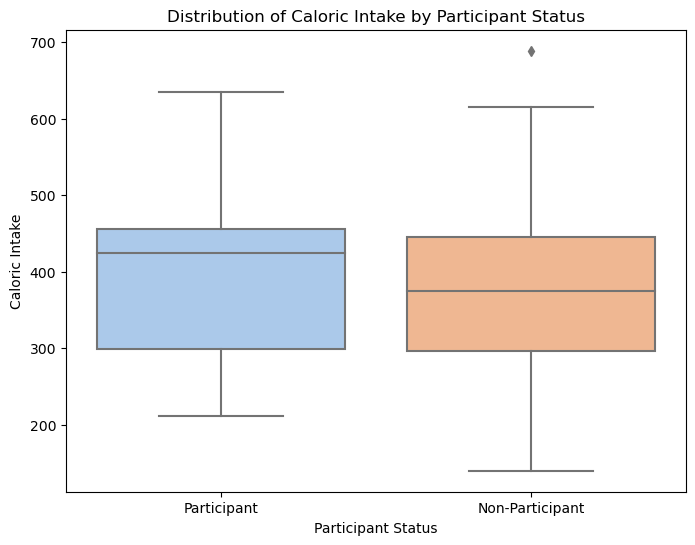

In [129]:
# Create box plot
plt.figure(figsize=(8, 6))
sns.boxplot(x='participant_status', y='caloric_intake', data=merged_df, palette='pastel')

# Add labels and title
plt.xlabel('Participant Status')
plt.ylabel('Caloric Intake')
plt.title('Distribution of Caloric Intake by Participant Status')

# Show plot
plt.show()

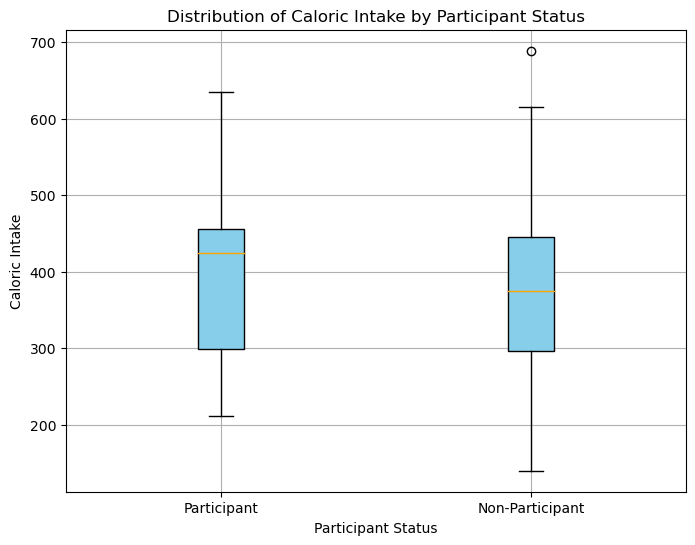

In [130]:
# Create box plot using Matplotlib
plt.figure(figsize=(8, 6))

# Box plot for participants
plt.boxplot([participants['caloric_intake'], nonparticipants['caloric_intake']], 
            labels=['Participant', 'Non-Participant'],
            patch_artist=True,  # Fill with color
            boxprops=dict(facecolor='skyblue'),  # Box color
            medianprops=dict(color='orange'))     # Median line color

# Add labels and title
plt.xlabel('Participant Status')
plt.ylabel('Caloric Intake')
plt.title('Distribution of Caloric Intake by Participant Status')

# Show plot
plt.grid(True)
plt.show()

- The median caloric intake of meal prep participants is ~425 calories, while the median caloric intake of nonparticipants is ~385.
- The non-participants' caloric intake has longer whiskers, indicating greater variablity beyong the IQR. The non-participants exhibit a greater range of calories consumed then the participants.
- There seem to be no outliers for the participants, while there is one outlier for non-participants.
- The participants' caloric intake is right-skewed because the median is towards the right and the left whisker is shorter than the right one, with more data points concentrated towards the higher caloric intakes. The non-participants' caloric intake is symmetric around the median suggesting that the data is evenly distributed around the median without a strong skew towards higher or lower caloric intakes.

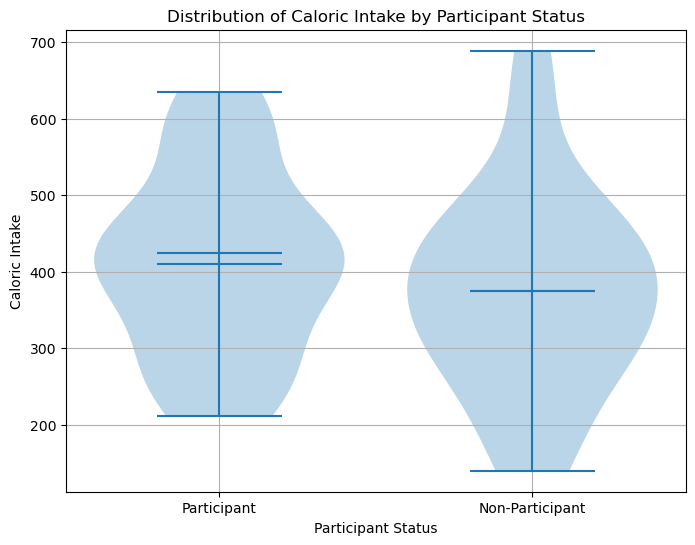

In [131]:
# Create violin plot using Matplotlib
plt.figure(figsize=(8, 6))

# Violin plot for participants and non-participants
plt.violinplot([participants['caloric_intake'], nonparticipants['caloric_intake']], 
               showmedians=True,  # Show median line
               showmeans=True,    # Show mean point
               showextrema=True,  # Show min and max lines
               widths=0.8,        # Width of the violin plots
               points=100)        # Number of points to evaluate each violin

# Add labels and title
plt.xlabel('Participant Status')
plt.ylabel('Caloric Intake')
plt.title('Distribution of Caloric Intake by Participant Status')

# Set x-axis ticks
plt.xticks([1, 2], ['Participant', 'Non-Participant'])

# Show plot
plt.grid(True)
plt.show()

# Question - 2 

Does the mean calorie consumption for those who participated in the meal preparation differ from **425**? Formally test at the $\alpha = 0.05$ level using the 5 steps outlined in the module. **(6 points)**


In [132]:
import numpy as np
from scipy.stats import t

# Step 1: Set up the hypotheses and select the alpha level
# Null Hypothesis: The mean calorie consumption for participants is 425
# Alternative Hypothesis: The mean calorie consumption for participants differs from 425
# alpha level
alpha = 0.10

# Step 2: Select the appropriate test statistic (t-statistic)
# Calculate the sample mean, sample standard deviation, and sample size
sample_mean = participants['caloric_intake'].mean()
sample_std = participants['caloric_intake'].std()
sample_size = participants['caloric_intake'].count()

# Calculate the t-statistic
t_statistic = (sample_mean - 425) / (sample_std / np.sqrt(sample_size))

# Step 3: State the decision rule
# Degrees of freedom
df = sample_size - 1

# Determine the critical value from the t-distribution
critical_value = t.ppf(1 - alpha/2, df)

# Step 4: Compute the test statistic and the associated p-value
# p-value (two-tailed test)
p_value = 2 * (1 - t.cdf(np.abs(t_statistic), df))

# Step 5: Conclusion
print("Test Statistic (t):", t_statistic)
print("Critical Value:", critical_value)
print("p-value:", p_value)

# Compare the test statistic with the critical value and p-value with alpha
if np.abs(t_statistic) > critical_value:
    print("Reject the null hypothesis. There is sufficient evidence to conclude that the mean calorie consumption differs from 425.")
else:
    print("Fail to reject the null hypothesis. There is not sufficient evidence to conclude that the mean calorie consumption differs from 425.")


Test Statistic (t): -0.6139385690489593
Critical Value: 1.7108820799094278
p-value: 0.5450319510318797
Fail to reject the null hypothesis. There is not sufficient evidence to conclude that the mean calorie consumption differs from 425.


# Question -3 
Calculate a **90%** confidence interval for the mean calorie intake for participants in the meal preparation. Interpret the confidence interval. **(6 points)**

In [133]:
import numpy as np
from scipy.stats import t

# Sample mean, sample standard deviation, and sample size
sample_mean = participants['caloric_intake'].mean()
sample_std = participants['caloric_intake'].std()
sample_size = participants['caloric_intake'].count()

# Degrees of freedom
df = sample_size - 1

# Critical value from the t-distribution for a 90% confidence level
alpha = 0.10  # 1 - confidence level
t_critical = t.ppf(1 - alpha / 2, df)

# Margin of error
margin_of_error = t_critical * (sample_std / np.sqrt(sample_size))

# Confidence interval
confidence_interval = (sample_mean - margin_of_error, sample_mean + margin_of_error)

print("Sample Mean:", sample_mean)
print("Sample Standard Deviation:", sample_std)
print("Sample Size:", sample_size)
print("Degrees of Freedom:", df)
print("Critical Value (t):", t_critical)
print("Margin of Error:", margin_of_error)
print("90% Confidence Interval:", confidence_interval)


Sample Mean: 410.07959999999997
Sample Standard Deviation: 121.51378616848378
Sample Size: 25
Degrees of Freedom: 24
Critical Value (t): 1.7108820799094278
Margin of Error: 41.579151843521
90% Confidence Interval: (368.50044815647897, 451.658751843521)


The 90% confidence interval (368.50, 451.66) for the mean calorie intake for participants in the meal preparation suggests that we are 90% confident that the true population mean calorie intake falls within this range.

Interpretation:
- The lower bound of the confidence interval, 368.50, indicates that we are 90% confident that the true mean calorie intake for participants is at least 368.50 calories.
- The upper bound of the confidence interval, 451.66, suggests that we are 90% confident that the true mean calorie intake for participants is no more than 451.66 calories.

If we were to conduct repeated sampling and construct confidence intervals in the same manner, we would expect approximately 90% of those intervals to contain the true population mean calorie intake for participants in the meal preparation.

# Question 4 
Formally test whether or not participants consumed 
more calories than non-participants at the $\alpha = 0.05$ level using the 5 steps procedure for hypothesis tests. **(6 points )**

In [134]:
participants.drop(columns=['participant_status'], inplace=True)
nonparticipants.drop(columns=['participant_status'], inplace=True)


In [135]:
from scipy import stats

# Step 1: Set up the hypotheses and select the alpha level
alpha = 0.05  # Significance level

# Null hypothesis: The mean caloric intake of participants is equal to the mean caloric intake of non-participants.
# Alternative hypothesis: The mean caloric intake of participants is greater than the mean caloric intake of non-participants.

# Step 2: Select the appropriate test statistic
# Independent samples t-test is appropriate for comparing means of two groups.

# Step 3: State the decision rule
# We will reject the null hypothesis if the p-value is less than alpha.

# Step 4: Compute the test statistic and the associated p-value
t_statistic, p_value = stats.ttest_ind(participants, nonparticipants, alternative='greater')

# Step 5: Draw a conclusion based on the test statistic, critical value, and alpha level
print("Test statistic:", t_statistic)
print("p-value:", p_value)

if p_value < alpha:
    print("Reject the null hypothesis. Participants consumed more calories than non-participants.")
else:
    print("Fail to reject the null hypothesis. There is no evidence that participants consumed more calories than non-participants.")


Test statistic: [0.96935044]
p-value: [0.16877591]
Fail to reject the null hypothesis. There is no evidence that participants consumed more calories than non-participants.
